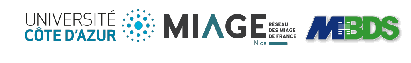

##### Deep Bridge - Nader CHATTI



# **Classification non supervisée à partir des données du fichier CSV**

## Importation de l’environnement / Initialisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Chargement des données

In [ ]:
# Accéder à My Google Drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/Dataset_Brain_MRI/data.csv"
data = pd.read_csv(path)

Mounted at /content/drive


## Prétraitement des données

In [ ]:
# Suppression des valeurs NAN
#data = data.fillna(0)
data = data.dropna()

#Suppression de la colone Patient
data = data.drop('Patient',axis=1)
data.head(10)

RNASeqCluster  MethylationCluster  miRNACluster  ...  race  ethnicity  death01
6             3.0                 3.0             2  ...   3.0        2.0      0.0
8             2.0                 4.0             1  ...   3.0        2.0      1.0
9             2.0                 4.0             3  ...   3.0        2.0      0.0
11            2.0                 5.0             1  ...   3.0        2.0      0.0
14            3.0                 2.0             2  ...   3.0        2.0      0.0
16            4.0                 2.0             2  ...   3.0        2.0      0.0
17            4.0                 5.0             1  ...   3.0        2.0      0.0
18            2.0                 4.0             4  ...   3.0        2.0      1.0
19            1.0                 5.0             2  ...   3.0        2.0      0.0
20            2.0                 4.0             1  ...   3.0        2.0      0.0

[10 rows x 17 columns]

## Matrice de corrélation

### Première matrice avec tous les champs

In [ ]:
# Création de la matrice de corrélation avec tous les champs du tableau
df = pd.DataFrame(data, columns=['RNASeqCluster','MethylationCluster','miRNACluster','CNCluster','RPPACluster','OncosignCluster','COCCluster','histological_type','neoplasm_histologic_grade','tumor_tissue_site','laterality','tumor_location','gender','age_at_initial_pathologic','race','ethnicity','death01'])

corrMatrix = df.corr()
print (corrMatrix)

                           RNASeqCluster  ...       death01
RNASeqCluster                   1.000000  ... -5.183955e-02
MethylationCluster             -0.437863  ... -8.186911e-02
miRNACluster                   -0.264079  ... -8.937125e-03
CNCluster                       0.358951  ... -4.510061e-02
RPPACluster                     0.333673  ... -8.058393e-02
OncosignCluster                -0.375222  ...  7.148787e-02
COCCluster                      0.356179  ...  8.179520e-03
histological_type               0.294686  ...  6.890410e-02
neoplasm_histologic_grade      -0.032936  ...  1.882483e-01
tumor_tissue_site                    NaN  ...           NaN
laterality                      0.033190  ... -5.133696e-18
tumor_location                 -0.200890  ...  1.165098e-01
gender                         -0.110115  ... -5.192378e-02
age_at_initial_pathologic       0.113808  ...  2.382030e-01
race                           -0.111465  ...  1.911274e-02
ethnicity                       0.141968

### Affichage de la matrice

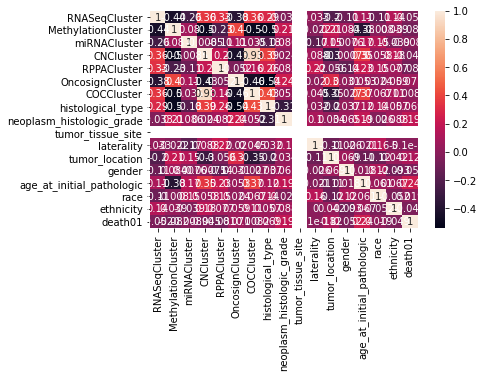

In [ ]:
# Affichage de la matrice de corrélation
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Nettoyage des données (Garder seulement les champs qui corrèlent positivement)

In [ ]:
# Récupération des indexes
positivCorr = np.empty((0,2), int)
for i in range(len(corrMatrix)):
  for j in range(len(corrMatrix)):
    if (corrMatrix.iloc[i,j] >= 0.4 and i != j):
      if (len(positivCorr) == 0):
        positivCorr = np.append(positivCorr, np.array([[i,j]]), axis=0)
      else:
        add = True
        for k in range(len(positivCorr)):
          if (positivCorr[k][0] == j and positivCorr[k][1] == i):
            add = False
        if (add):
          positivCorr = np.append(positivCorr, np.array([[i,j]]), axis=0)

idx = []
for i in range(len(positivCorr)):
  for j in range(2):
    #resCorr = np.append(resCorr, np.array([[i,j]]), axis=0)
    if (len(idx) == 0):
      idx = np.append(idx,positivCorr[i][j])
    else:
      add = True
      for k in range(len(idx)):
        if (positivCorr[i,j] == idx[k]):
          add = False
      if (add):
        idx = np.append(idx,positivCorr[i][j])

resCorr = np.empty((0,5), int)
cols = []
for i in range(len(idx)):
  cols = np.append(cols, df.columns[i])
  tab = np.empty(0)
  for j in range(len(idx)):
    tab = np.append(tab, corrMatrix.iloc[int(idx[i]), int(idx[j])])
  resCorr = np.append(resCorr, np.array([tab]), axis=0)

newCorrMatrix = pd.DataFrame(resCorr, cols)

### Affichage de la matrice

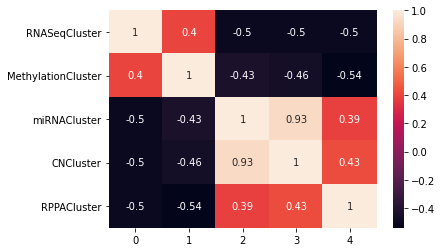

In [ ]:
sn.heatmap(newCorrMatrix, annot=True)
plt.show()

## Clustering - Application de la méthode KMEANS

In [ ]:
# Récupération des valeur du dataset correspondant aux indexes
X = data.iloc[:, idx].values

### Identification du nombre des clusters

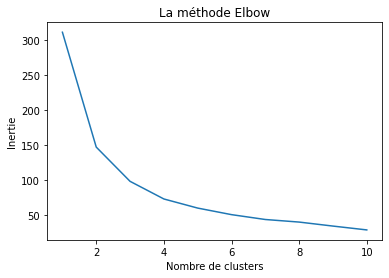

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters= k, init='k-means++', random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

# Affichage du graph
plt.plot(k_range, inertia)
plt.title("La méthode Elbow")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

### Application de KMeans

In [ ]:
# Application de la méthode K-Means
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

## Visualisation sous forme de nuage de points

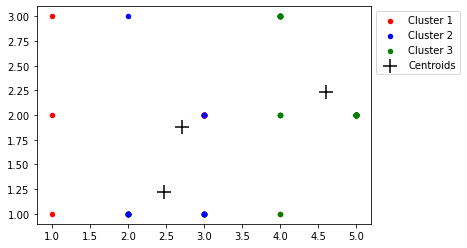

In [ ]:
#Visualizing all the clusters 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], marker = '+', s = 200, c = 'black', label = 'Centroids')
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Interprétation du résultat
Les données du CSV restent non interprétables, la seule conclusion est que ces données ne sont pas adaptées à ce genre de traitements